In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
labels_train = []
labels_test = []

# storing path for train test
path_train = []
path_test = []

In [3]:
train_path = "/content/drive/MyDrive/train_ob"
test_path = "/content/drive/MyDrive/test_ob"

for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))


label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))


print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


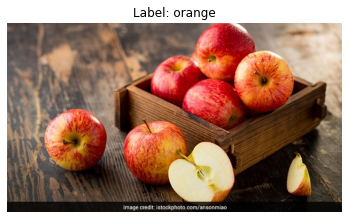

In [5]:
image = cv2.imread(path_train[5])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_train[100])
plt.axis('off')
plt.show()


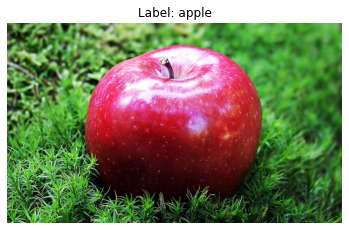

In [6]:
image = cv2.imread(path_test[10])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[5])
plt.axis('off')
plt.show()

In [7]:
X_train = []

for path in path_train:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_train.append(final_img)

X_train = np.array(X_train)

In [8]:
X_test = []

for path in path_test:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_test.append(final_img)

X_test = np.array(X_test)

In [9]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits    

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [10]:
# storing the values in a temporary list
temp_train = []
temp_test = []

# all the fruits names are being mapped
for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [11]:
y_train = keras.utils.np_utils.to_categorical(temp_train, 4)
y_test =keras.utils.np_utils.to_categorical(temp_test, 4)

Length of X_train:  240


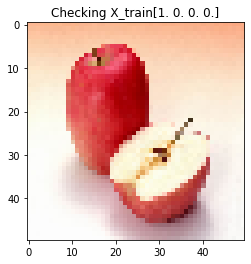

In [12]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[20])
plt.title("Checking X_train"+str(y_train[20]))
plt.show()

Length of X_test:  60


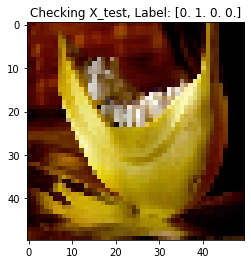

In [13]:
print("Length of X_test: ", len(X_test))
plt.imshow(X_test[40])
plt.title("Checking X_test, Label: " + str(y_test[40]))
plt.show()

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [16]:
svm_hog = Sequential()

svm_hog.add(Conv2D(32, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"))
svm_hog.add(Conv2D(32, (3, 3), activation="relu"))
svm_hog.add(MaxPooling2D(pool_size=(2, 2)))
svm_hog.add(Dropout(0.25))

svm_hog.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
svm_hog.add(Conv2D(64, (3, 3), activation="relu"))
svm_hog.add(MaxPooling2D(pool_size=(2, 2)))
svm_hog.add(Dropout(0.25))

svm_hog.add(Flatten())
svm_hog.add(Dense(512, activation="relu"))
svm_hog.add(Dropout(0.5))
svm_hog.add(Dense(4, activation="softmax"))


svm_hog.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

history = svm_hog.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/150
6/6 [==============================] - 4s 487ms/step - loss: 1.2075 - accuracy: 0.3646 - val_loss: 1.6751 - val_accuracy: 0.0625
Epoch 2/150
6/6 [==============================] - 3s 430ms/step - loss: 0.7953 - accuracy: 0.6302 - val_loss: 3.4545 - val_accuracy: 0.2083
Epoch 3/150
6/6 [==============================] - 3s 432ms/step - loss: 0.5370 - accuracy: 0.7969 - val_loss: 4.7203 - val_accuracy: 0.2500
Epoch 4/150
6/6 [==============================] - 3s 428ms/step - loss: 0.4426 - accuracy: 0.8125 - val_loss: 4.2147 - val_accuracy: 0.3958
Epoch 5/150
6/6 [==============================] - 3s 427ms/step - loss: 0.3199 - accuracy: 0.9167 - val_loss: 4.7670 - val_accuracy: 0.3750
Epoch 6/150
6/6 [==============================] - 3s 431ms/step - loss: 0.2087 - accuracy: 0.9219 - val_loss: 5.5127 - val_accuracy: 0.4792
Epoch 7/150
6/6 [==============================] - 3s 433ms/step - loss: 0.1739 - accuracy: 0.9167 - val_loss: 5.3351 - val_accuracy: 0.5000
Epoch 8/150
6

In [17]:
import matplotlib.pyplot as plt
test_sample=6
random_state=0.7
from skimage.feature import hog
from skimage import data, exposure

for i in range(0,len(temp_train)):

  image = X_train[i]

  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, multichannel=True)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()
import sys
sys.path.insert(0,"/content/drive/MyDrive/utils")
import visualization_utils


Output hidden; open in https://colab.research.google.com to view.

In [18]:

print("Svm Based Hog Accuracy:"+str(visualization_utils.model_score(test_sample,random_state)))
ac=(visualization_utils.model_score(test_sample,random_state)*100)

Svm Based Hog Accuracy:0.92


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(91.0, 96.0)

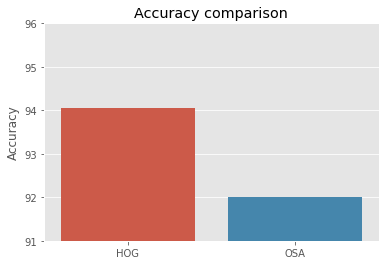

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
plt.style.use('ggplot')
x=['HOG','OSA']
accuracy=[94.06,ac]

ax=sns.barplot(x,accuracy)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

low = min(accuracy)
high = max(accuracy)
ax.set_ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])